# Inspect new data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data from paper: 10.1016/j.cell.2021.08.023
cBioPortal: https://www.cbioportal.org/study/summary?id=paad_cptac_2021

In [20]:
### NB: I DUE DATASET SONO NORMALIZZATI IN MANIERA DIFFERENTE, IL CONFRONTO POTREBBE NON ESSERE COSì IMMEDIATO
df_mirna_new = pd.read_csv('/g100_work/ELIX5_fratelli/ShortPaper_CIBB25/data/paad_cptac_2021/data_mirna.txt', sep='\t').set_index('Hugo_Symbol')
df_rna_new = pd.read_csv('/g100_work/ELIX5_fratelli/ShortPaper_CIBB25/data/paad_cptac_2021/data_mrna_seq_v2_rsem.txt', sep='\t').set_index('Hugo_Symbol')
print('mirna', df_mirna_new.shape)
print('rna', df_rna_new.shape)

mirna (2416, 137)
rna (28057, 141)


In [29]:
print('number of common patients between mirna and mrna')
pat_comm = np.intersect1d(df_mirna_new.columns, df_rna_new.columns)
len(pat_comm)

number of common patients between mirna and mrna


137

In [34]:
# keep onmly copmmon patients
subdf_rna = df_rna_new[pat_comm]
newdf_rna_sort = subdf_rna[sorted(subdf_rna.columns)]
newdf_mirna_sort = df_mirna_new[sorted(df_mirna_new.columns)]

In [37]:
all(newdf_mirna_sort.columns == newdf_rna_sort.columns)

True

count    28057.000000
mean         0.665919
std          1.528396
min          0.000000
25%          0.101703
50%          0.264272
75%          0.752551
max         41.932272
dtype: float64

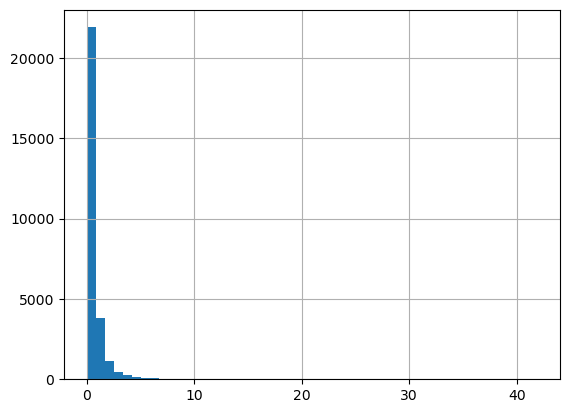

In [114]:
# Check variance
newdf_rna_sort.var(axis=1).hist(bins=50)
newdf_rna_sort.var(axis=1).describe()

## Load results from wgcna analysis 

In [5]:
# Load significant miRNAs associated to treatments, divided into modules
path_miRNA = '/g100_work/ELIX5_fratelli/ShortPaper_CIBB25/WGCNA_miRNA/output/'
file_list = ['significant_genes_black_data.GEMTAX.vs.all.txt',
    'significant_genes_blue_data.VSGT.vs.all.txt',
    'significant_genes_brown_data.VSGT.vs.all.txt',
    'significant_genes_red_data.VSGT.vs.all.txt',
    'significant_genes_yellow_data.VSGT.vs.all.txt']
 
miRNA_data = {} 
 
for value in file_list:
    with open(path_miRNA + value, "r", encoding="utf-8") as file:
        miRNA_data['miRNA_'+value.split('_')[2]+'_'+value.split('.')[1].replace('GEMTAX', 'GT')] = [x.replace('\n', '').replace('.', '-') for x in file.readlines()]  
 
miRNA_data.keys()

dict_keys(['miRNA_black_GT', 'miRNA_blue_VSGT', 'miRNA_brown_VSGT', 'miRNA_red_VSGT', 'miRNA_yellow_VSGT'])

In [6]:
# Load significant GENES associated to treatments, divided into modules
path_RNA = '/g100_work/ELIX5_fratelli/ShortPaper_CIBB25/WGCNA_mRNA/output/'
file_list1 = [
    'significant_genes_green_data.VS_GEMTAX.vs.all.txt',
    'significant_genes_greenyellow_data.VPA.vs.all.txt',
    'significant_genes_magenta_data.VS_GEMTAX.vs.all.txt',
    'significant_genes_pink_data.VS_GEMTAX.vs.all.txt',
    'significant_genes_red_data.VS_GEMTAX.vs.all.txt',
    'significant_genes_tan_data.GEMTAX.vs.all.txt',
    'significant_genes_tan_data.VPA_SIM.vs.all.txt'
]
 
RNA_data = {} 
 
for value in file_list1:
    with open(path_RNA + value, "r", encoding="utf-8") as file:
        RNA_data['RNA_'+value.split('_')[2]+'_'+value.split('.')[1].replace('VS_GEMTAX', 'VSGT').replace('VPA_SIM', 'VS').replace('GEMTAX', 'GT')] = [x.replace('\n', '').replace('.', '-') for x in file.readlines()]  
RNA_data.keys()

dict_keys(['RNA_green_VSGT', 'RNA_greenyellow_VPA', 'RNA_magenta_VSGT', 'RNA_pink_VSGT', 'RNA_red_VSGT', 'RNA_tan_GT', 'RNA_tan_VS'])

In [43]:
# Map gene_id to gene_name because WGCNA was done with gene_id but miRTarBase_MTI (for target analysis) uses gene_name
rna_data_path = '/g100_work/ELIX5_fratelli/ShortPaper_CIBB25/WGCNA_mRNA/data/'
dict_id_name = pd.read_csv(rna_data_path+'salmon.merged.gene_counts.tsv', sep='\t', usecols=['gene_id', 'gene_name'])
id_to_name = dict(zip(dict_id_name['gene_id'], dict_id_name['gene_name']))
RNA_data = {
    key: [id_to_name.get(gene_id, gene_id) for gene_id in gene_list] for key, gene_list in RNA_data.items()
}

In [14]:
len(miRNA_data['miRNA_red_VSGT'] + miRNA_data['miRNA_yellow_VSGT'])

52

## Filter new data with old ones

In [46]:
# filter mirna and mrna 
print('get only CIBB mirna (yellow + red) from new data')
mirna_redyellow = np.intersect1d(miRNA_data['miRNA_red_VSGT'] + miRNA_data['miRNA_yellow_VSGT'], newdf_mirna_sort.index.tolist())
print(len(mirna_redyellow))

print('get only CIBB rna (red) from new data')
rna_red = np.intersect1d(RNA_data['RNA_red_VSGT'], newdf_rna_sort.index.tolist())
print(len(rna_red))

get only CIBB mirna (yellow + red) from new data
52
get only CIBB rna (red) from new data
520


In [116]:
# create df with only yellow+red mirna and red rna
newdf_mirna_RY = newdf_mirna_sort.loc[mirna_redyellow] 
newdf_rna_R = newdf_rna_sort.loc[rna_red] 

print('mirna RY', newdf_mirna_RY.shape)
print('rna R', newdf_rna_R.shape)

mirna RY (52, 137)
rna R (520, 137)


count    520.000000
mean       0.299192
std        0.442977
min        0.035334
25%        0.110723
50%        0.182874
75%        0.371451
max        7.797280
dtype: float64

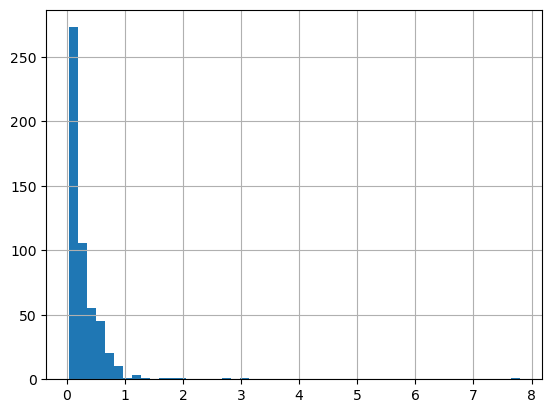

In [117]:
# Check variance
newdf_rna_R.var(axis=1).hist(bins=50)
newdf_rna_R.var(axis=1).describe()

## Calculate and display correlation heatmap

In [64]:
# Check if there is a normal distribution in the normalized data -> check norm on rows since we want to compare genes and not samples
from scipy.stats import normaltest
print('miRNA p<0.05 normality: ', normaltest(newdf_mirna_RY, axis=1).pvalue < 0.05)
print('mRNA p<0.05 normality: ', normaltest(newdf_rna_R, axis=1).pvalue < 0.05)

miRNA p<0.05 normality:  [ True False  True False False False  True False False False False  True
 False False False False False False  True False False False  True False
 False  True  True False False False False False False False False False
 False  True False  True  True False False False  True False False False
  True False  True  True]
mRNA p<0.05 normality:  [False False  True False  True False  True False  True  True False False
 False  True False False  True  True False False  True False  True  True
  True False False  True  True  True  True  True False False  True  True
 False  True False  True  True False  True  True False  True  True False
 False  True False False  True False False False  True  True  True  True
  True False  True False False False False  True  True  True  True False
 False False  True False False False False  True False  True False  True
 False  True False  True  True  True  True False False  True False  True
  True False False False  True False  True  True 

/g100_work/PROJECTS/spack/preprod/05/install/0.21/linux-centos8-skylake_avx512/gcc-8.4.1/anaconda3-2023.09-0-mf72uym2gtg6f4ckmk53tvjhhycgior6/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/g100_work/PROJECTS/spack/preprod/05/install/0.21/linux-centos8-skylake_avx512/gcc-8.4.1/anaconda3-2023.09-0-mf72uym2gtg6f4ckmk53tvjhhycgior6/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


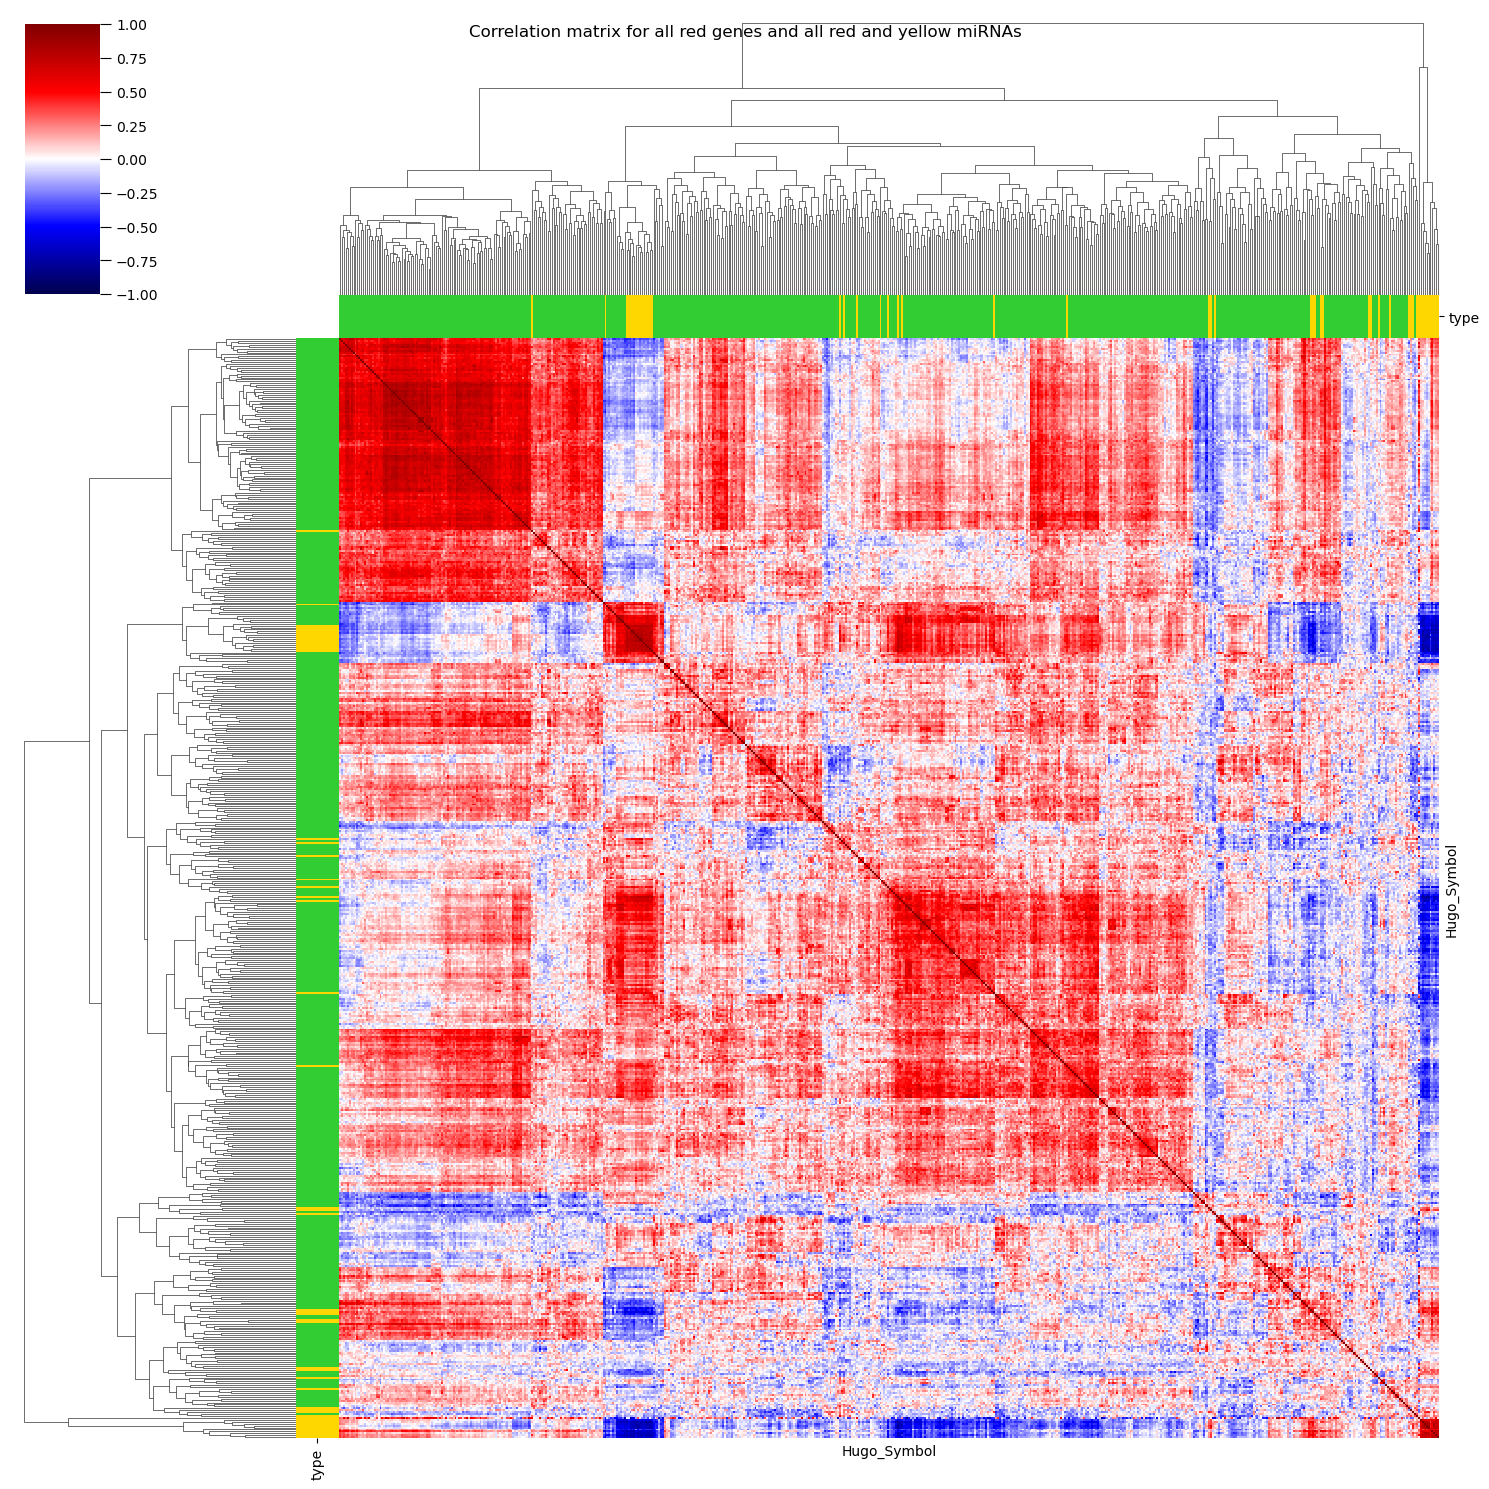

In [68]:
# Calculate correlation
rna4corr = newdf_rna_R
rna4corr['type'] = 'limegreen'
mirna4corr = newdf_mirna_RY
mirna4corr['type'] = 'gold'
df4corr = pd.concat([rna4corr, mirna4corr]).T
df_corr = df4corr.drop('type').corr(method='spearman')

sns.clustermap(df_corr, vmin=-1, vmax=1, cmap='seismic', figsize=(15, 15), 
               row_colors=df4corr.loc['type', ], col_colors=df4corr.loc['type', ], yticklabels=False ,xticklabels=False)
plt.tick_params(axis='y', direction='out', length=8)
plt.suptitle('Correlation matrix for all red genes and all red and yellow miRNAs')
plt.show()

<Axes: xlabel='Hugo_Symbol', ylabel='Hugo_Symbol'>

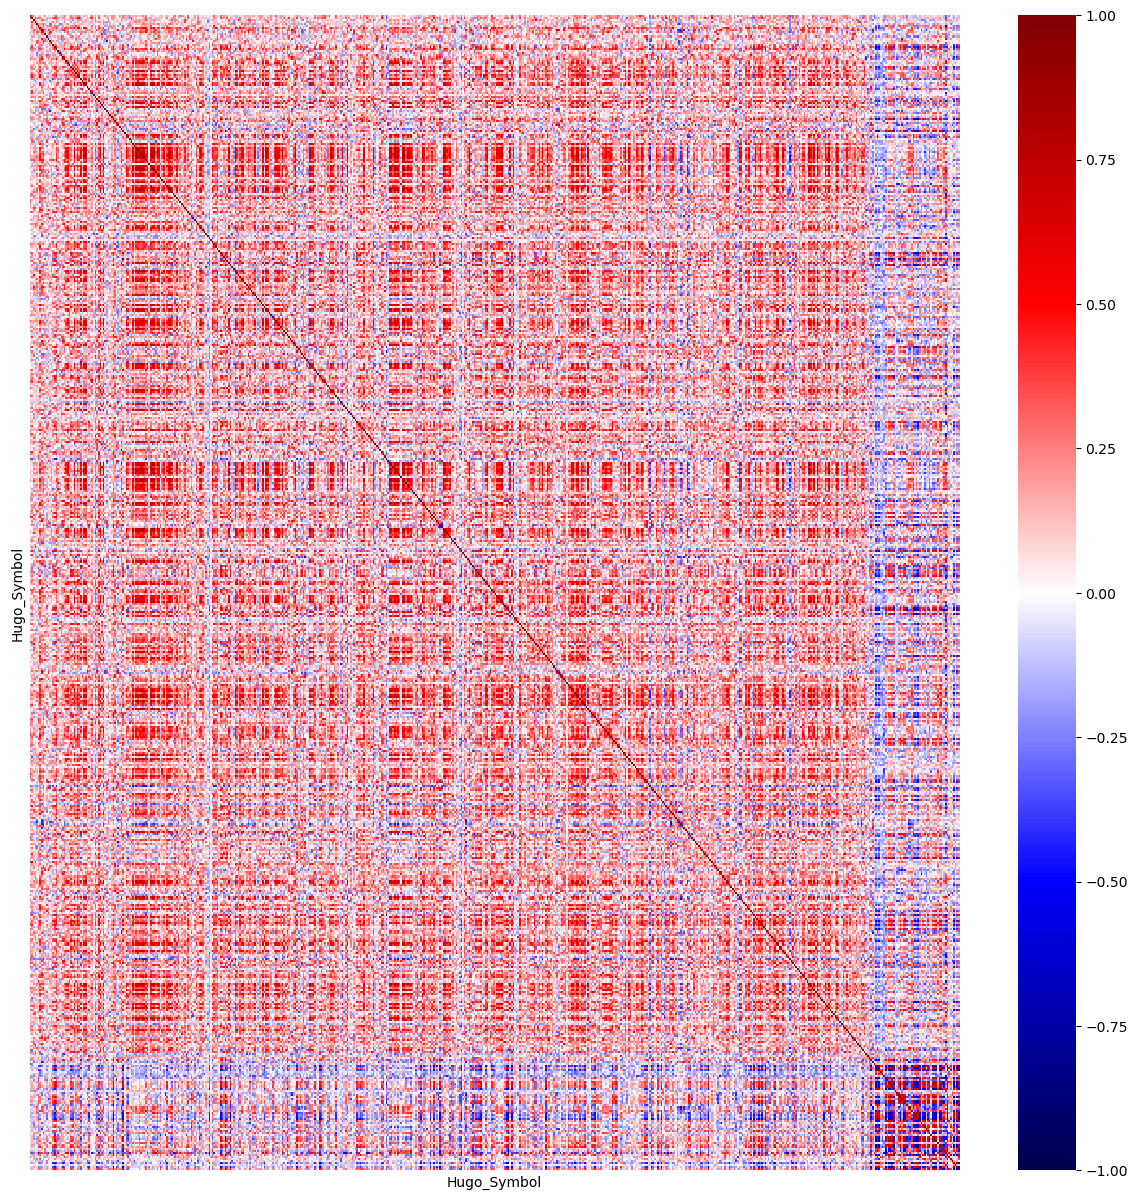

In [72]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap='seismic', #figsize=(15, 15), 
               #row_colors=df4corr.loc['type', ], col_colors=df4corr.loc['type', ], 
            yticklabels=False ,xticklabels=False)
# plt.tick_params(axis='y', direction='out', length=8)
# plt.suptitle('Correlation matrix for all red genes and all red and yellow miRNAs')
# plt.show()

In [93]:
df_tot[df_tot['C3L-00017'].isna()==True]

,C3L-00017,C3L-00102,C3L-00189,C3L-00277,C3L-00401,C3L-00589,C3L-00598,C3L-00599,C3L-00622,C3L-00625,...,C3N-03839,C3N-03840,C3N-03853,C3N-03884,C3N-04119,C3N-04126,C3N-04282,C3N-04283,C3N-04284,type
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
hsa-miR-1269a,NaN,2.773922,-1.709501,NaN,NaN,NaN,-3.749258,-3.044523,-2.974665,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gold
hsa-miR-4716-3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gold


/g100_work/PROJECTS/spack/preprod/05/install/0.21/linux-centos8-skylake_avx512/gcc-8.4.1/anaconda3-2023.09-0-mf72uym2gtg6f4ckmk53tvjhhycgior6/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


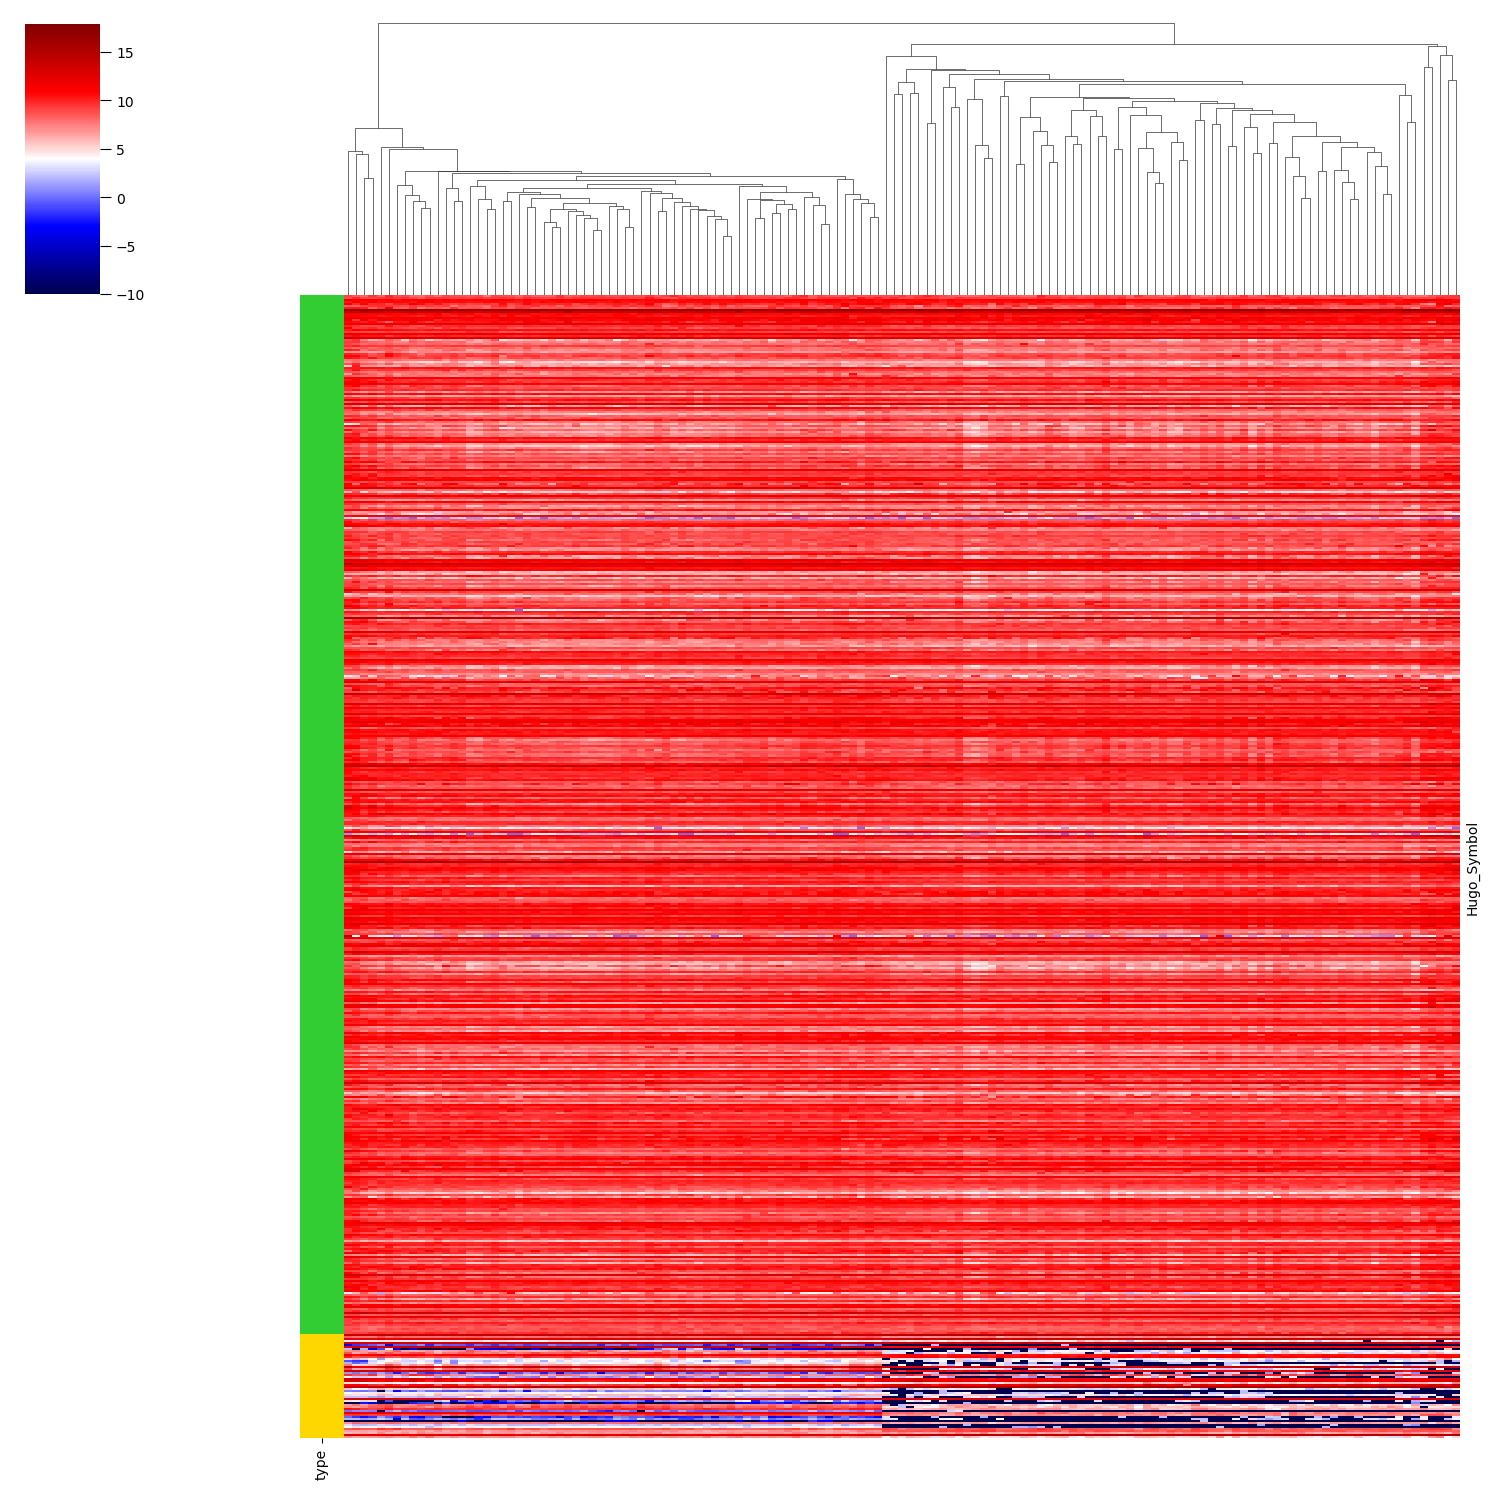

In [103]:
rna4corr = newdf_rna_R
rna4corr['type'] = 'limegreen'
mirna4corr = newdf_mirna_RY
mirna4corr['type'] = 'gold'
df_tot = pd.concat([rna4corr, mirna4corr]).fillna(-10)


sns.clustermap(df_tot.drop(columns='type'), #vmin=-1, vmax=1, 
               cmap='seismic', figsize=(15, 15), 
               row_cluster= False,
               row_colors=df_tot['type'],  
               yticklabels=False ,xticklabels=False)
plt.tick_params(axis='y', direction='out', length=8)
# plt.suptitle('Correlation matrix for all red genes and all red and yellow miRNAs')
plt.show()

In [7]:
# Load significant miRNAs associated to treatments, divided into modules
mirna_data_path = '/g100_work/ELIX5_fratelli/ShortPaper_CIBB25/WGCNA_miRNA/data/' 
rna_data_path = '/g100_work/ELIX5_fratelli/ShortPaper_CIBB25/WGCNA_mRNA/data/'

mirna_counts = pd.read_csv(mirna_data_path+'mature_counts.csv').set_index('Unnamed: 0').T.sort_index(axis=1)
rna_counts = pd.read_csv(rna_data_path+'salmon.merged.gene_counts.tsv', sep='\t')
rna_counts.columns = [x.replace('VPA_SIM', 'VPASIM').replace('VS_GEMTAX', 'VSGT') for x in rna_counts.columns]

In [ ]:
# The three modules (1 for mRNAs and 2 for miRNAs) we are considering in the following analyses
rna_counts_red = rna_counts[rna_counts.gene_id.isin(RNA_data['RNA_red_VSGT'])].drop(columns='gene_id').set_index('gene_name')
mirna_counts_red_yellow = mirna_counts.loc[miRNA_red_yellow_VSGT]